In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import time
from scipy import sparse
from collections import defaultdict,OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree

import sys
sys.path.append('../model')
from helper import * 
from ann_kdtree import *

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.window import Window
from pyspark.sql.types import *
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 

In [2]:
df = pd.read_csv('../ml-latest/ratings.csv') 
df_sample = sample_df(df)

number of users: 20000
number of items: 1000
number of ratings: 1179969


In [ ]:
train_df, test_df = train_test_split_by_time(df_sample)

rating_train = train_df.pivot(index='movieId', columns='userId', values='rating')
rating_test = test_df.pivot(index='movieId', columns='userId', values='rating')

# ANN

In [43]:
#cross validate
from tqdm import tqdm
k_items = 10

max_iter_list = [5, 10, 15]
rank_list = [5, 10, 20]
leaf_size_list = [15, 30, 50]

recall_list = []
for max_iter in tqdm(max_iter_list):
    for rank in tqdm(rank_list):
        for leaf_size in tqdm(leaf_size_list):
            model_ann = ann_kdtree(max_iter=max_iter, regparam=0.1, rank=rank, leaf_size=leaf_size, k_items=k_items)
            model_ann.fit(train_df)
            rating_pred =  model_ann.pred(test_df)
            user_recalls, avg_recall = recall_over_user(rating_test, rating_pred, k_items=k_items, plot=False)
            recall_list.append((max_iter, rank, leaf_size, avg_recall))
sorted(recall_list, key = lambda tup: tup[3])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 33%|███▎      | 1/3 [00:59<01:58, 59.39s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 67%|██████▋   | 2/3 [02:01<01:00, 60.07s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




100%|██████████| 3/3 [03:04<00:00, 61.58s/it]

 33%|███▎      | 1/3 [03:04<06:09, 184.76s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 33%|███▎      | 1/3 [01:07<02:14, 67.18s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 67%|██████▋   | 2/3 [02:12<01:06, 66.52s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




100%|██████████| 3/3 [03:15<00:00, 65.31s/it]

 67%|██████▋   | 2/3 [06:20<03:08, 188.12s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 33%|███▎      | 1/3 [01:12<02:25, 72.69s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 67%|██████▋   | 2/3 [02:23<01:12, 72.09s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




100%|██████████| 3/3 [03:29<00:00, 69.97s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 33%|███▎      | 1/3 [01:04<02:08, 64.05s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 67%|██████▋   | 2/3 [02:07<01:03, 63.80s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




100%|██████████| 3/3 [03:08<00:00, 63.00s/it]

 33%|███▎      | 1/3 [03:08<06:17, 189.00s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 33%|███▎      | 1/3 [01:07<02:14, 67.39s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 67%|██████▋   | 2/3 [02:13<01:07, 67.10s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




100%|██████████| 3/3 [03:19<00:00, 66.52s/it]

 67%|██████▋   | 2/3 [06:28<03:12, 192.17s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 33%|███▎      | 1/3 [01:16<02:32, 76.28s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 67%|██████▋   | 2/3 [02:30<01:15, 75.75s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




100%|██████████| 3/3 [03:45<00:00, 75.21s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 33%|███▎      | 1/3 [01:06<02:13, 66.76s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 67%|██████▋   | 2/3 [02:12<01:06, 66.39s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




100%|██████████| 3/3 [03:16<00:00, 65.58s/it]

 33%|███▎      | 1/3 [03:16<06:33, 196.75s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 33%|███▎      | 1/3 [01:12<02:24, 72.46s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 67%|██████▋   | 2/3 [02:25<01:12, 72.53s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




100%|██████████| 3/3 [03:37<00:00, 72.39s/it]

 67%|██████▋   | 2/3 [06:53<03:22, 202.88s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 33%|███▎      | 1/3 [01:24<02:48, 84.03s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




 67%|██████▋   | 2/3 [02:51<01:24, 84.99s/it]

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.




100%|██████████| 3/3 [04:15<00:00, 85.23s/it]

100%|██████████| 3/3 [31:14<00:00, 624.85s/it]


[(15, 5, 15, 0.028656964285714286),
 (15, 5, 30, 0.028656964285714286),
 (15, 5, 50, 0.028656964285714286),
 (10, 5, 15, 0.028763353174603174),
 (10, 5, 30, 0.028763353174603174),
 (10, 5, 50, 0.028763353174603174),
 (5, 5, 15, 0.03153494047619047),
 (5, 5, 30, 0.03153494047619047),
 (5, 5, 50, 0.03153494047619047),
 (15, 10, 15, 0.0399479365079365),
 (15, 10, 30, 0.0399479365079365),
 (15, 10, 50, 0.0399479365079365),
 (15, 20, 15, 0.04146404761904762),
 (15, 20, 30, 0.04146404761904762),
 (15, 20, 50, 0.04146404761904762),
 (10, 10, 15, 0.04186632936507936),
 (10, 10, 30, 0.04186632936507936),
 (10, 10, 50, 0.04186632936507936),
 (10, 20, 15, 0.046545357142857145),
 (10, 20, 30, 0.046545357142857145),
 (10, 20, 50, 0.046545357142857145),
 (5, 10, 15, 0.047943392857142865),
 (5, 10, 30, 0.047943392857142865),
 (5, 10, 50, 0.047943392857142865),
 (5, 20, 15, 0.055998769841269835),
 (5, 20, 30, 0.055998769841269835),
 (5, 20, 50, 0.055998769841269835)]

In [48]:
#model

k_items = 10

max_iter = 5
rank = 20
leaf_size = 50

start = time.time()  
model_ann = ann_kdtree(max_iter=max_iter, regparam=0.1, rank=rank, leaf_size=leaf_size, k_items=k_items)
model_ann.fit(train_df)
end = time.time()  
train_time = end - start

start = time.time()  
rating_pred =  model_ann.pred(test_df)
end = time.time() 
test_time = end - start 

print("train_time: ", train_time)
print("test_time: ", test_time)

training begins ......
Begin to retrieve latent features from cf ......
training finishes.
prediction begins ......
prediciton finishes.
train_time:  47.35870885848999
test_time:  29.512703895568848


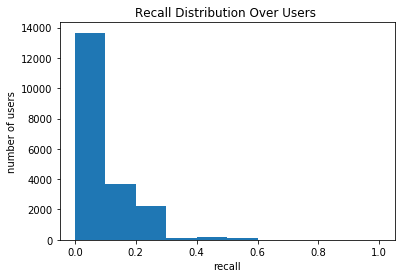

Mean Recall: 0.056
Recall for each user group:  {'10-50': 0.0338, '50-100': 0.0351, '100-500': 0.0339, '500-1000': 0.0667}


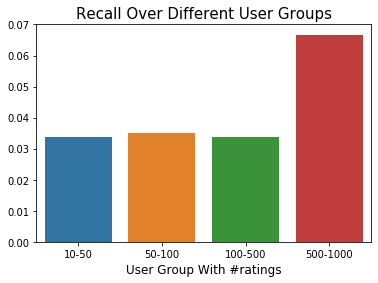

User coverage:  the fraction of users for which at least 1 items can be recommended well is 0.317
Item coverage: the fraction of items that can be recommended to at least 1 users well is 0.445
Catalog coverage: the fraction of items that are in the top-10 for at least 1 user is 0.445

NDCG: 0.325


In [49]:
#evaluation
k_items = k_items
rating_pred = rating_pred

#recall
user_recalls, avg_recall = recall_over_user(rating_test, rating_pred, k_items=k_items)
print(f"Mean Recall: {avg_recall:.3f}")
user_grouped = group(train_df, 'user')
recall_dict = recall_over_user_group(rating_test, rating_pred, user_grouped=user_grouped, k_items=k_items)

#coverage
user_cov = cal_coverage(rating_test, rating_pred, k_items=k_items, threshold=1, coverage_type='user')
movie_cov = cal_coverage(rating_test, rating_pred, k_items=k_items, threshold=1, coverage_type = 'item')
catalog_cov = cal_coverage(rating_test, rating_pred, k_items=k_items, threshold=1, coverage_type = 'catalog')

#ndcg
ndcg_score = ndcg(rating_test, rating_pred)
print()
print(f"NDCG: {ndcg_score:.3f}")

We acheive the max average recall of 0.056 with cross validation, by setting max_iter=5, rank=20, leaf_size=50.